# WeatherPy
----

### Analysis
* In regards to max temperature in cities, it is possible to infer that it gets higher as it moves torwards latitude 0, or Ecuador line. We can also see that south hemisphere tends ot be warmer than northe hemisphere when comparing its oposite simetric latitudes (example: a North citi at latitude 70 vs. a latitude -70 which would be a southern hemisphere city).
* There seems to have no correlation between city latitudes and humidity. This means humidity might not be a consequence of where the city is located in the globe in terms of latitude, but perhaps how far the city is from river, sea or ocean for instance. 
* There seems to have no correlation between city latitudes and wind speed. This means the city"s latitude is probably not a good factor to understand its wind speed. Maybe how far from enclosed mountains or wind currents could be possible drivers to understand a city"s wind speed. 

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [65]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime

# Import my API key
api_key = "0278588c008cce622dfc6045cb326ae9"

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)



## Generate Cities List

In [66]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))

602


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [67]:
# Transforming list to df
complete_df = pd.DataFrame(np.array(cities))
complete_df = complete_df.rename(columns={0: "City"})
complete_df.head()

,City
0,plettenberg bay
1,pangnirtung
2,hilo
3,hermanus
4,jacareacanga


In [68]:
# setting up dataframe to hold information

complete_df['Cloudiness'] = ""
complete_df['Country'] = ""
complete_df['Date'] = ""
complete_df['Humidity'] = ""
complete_df['Lat'] = ""
complete_df['Lng'] = ""
complete_df['Max Temp'] = ""
complete_df['Wind Speed'] = ""
complete_df['Temperature'] = ""


complete_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed,Temperature
0,plettenberg bay,,,,,,,,,
1,pangnirtung,,,,,,,,,
2,hilo,,,,,,,,,
3,hermanus,,,,,,,,,
4,jacareacanga,,,,,,,,,


In [69]:
# Creating backup for API call
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Complete query URL to be used in the loop
query_url = f"{url}appid={api_key}&units={units}&q={cities}"


# Using iterrows to iterate through pandas dataframe
for index, row in complete_df.iterrows():

    # get restaurant type from df
    cities = row['City']
    # assemble url and make API request
    query_url = f"{url}appid={api_key}&units={units}&q={cities}"
    response = requests.get(query_url)
    weather_json = response.json()
    
    # fixing loop to continue ruunning even with missing cities
    
    try:
        
        row["Cloudiness"] = weather_json["clouds"]["all"]
        row["Country"] = weather_json["sys"]["country"]
        row["Humidity"] = weather_json["main"]["humidity"]
        row["Lat"] = weather_json["coord"]["lat"]
        row["Lng"] = weather_json["coord"]["lon"]
        row["Max Temp"] = weather_json["main"]["temp_max"]
        row["Wind Speed"] = weather_json["wind"]["speed"]
        row["Temperature"] = weather_json["main"]["temp"]
        row["Date"] = str(datetime.datetime.now().date())
        
    except (KeyError, IndexError):
        print("city not in openweather")
        
        

city not in openweather
city not in openweather
city not in openweather
city not in openweather
city not in openweather
city not in openweather
city not in openweather
city not in openweather
city not in openweather
city not in openweather
city not in openweather
city not in openweather
city not in openweather
city not in openweather
city not in openweather
city not in openweather
city not in openweather
city not in openweather
city not in openweather
city not in openweather
city not in openweather
city not in openweather
city not in openweather
city not in openweather
city not in openweather
city not in openweather
city not in openweather
city not in openweather
city not in openweather
city not in openweather
city not in openweather
city not in openweather
city not in openweather
city not in openweather
city not in openweather
city not in openweather
city not in openweather
city not in openweather
city not in openweather
city not in openweather
city not in openweather
city not in open

In [70]:
complete_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed,Temperature
0,plettenberg bay,0,ZA,2018-10-20,100,-34.05,23.37,14.5,8.76,14.5
1,pangnirtung,32,CA,2018-10-20,100,66.15,-65.72,-8.83,2.11,-8.83
2,hilo,75,US,2018-10-20,83,19.71,-155.08,24,5.01,20.04
3,hermanus,20,ZA,2018-10-20,52,-34.42,19.24,13.43,4.86,13.43
4,jacareacanga,8,BR,2018-10-20,92,-6.22,-57.76,25.35,1.41,25.35


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [71]:
# Exporting file in CSV format

complete_df.to_csv("../Resources/weather_cities.csv")

In [72]:
# Calling data frame through csv  
complete_df = pd.read_csv("../Resources/weather_cities.csv")
complete_df.head()

,Unnamed: 0,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed,Temperature
0,0,plettenberg bay,0.0,ZA,2018-10-20,100.0,-34.05,23.37,14.50,8.76,14.50
1,1,pangnirtung,32.0,CA,2018-10-20,100.0,66.15,-65.72,-8.83,2.11,-8.83
2,2,hilo,75.0,US,2018-10-20,83.0,19.71,-155.08,24.00,5.01,20.04
3,3,hermanus,20.0,ZA,2018-10-20,52.0,-34.42,19.24,13.43,4.86,13.43
4,4,jacareacanga,8.0,BR,2018-10-20,92.0,-6.22,-57.76,25.35,1.41,25.35


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

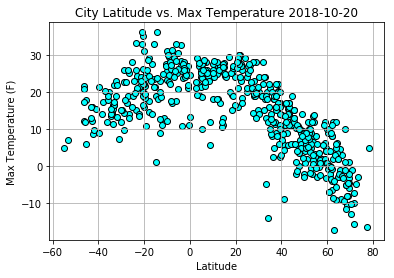

In [73]:
# Determining x and y axis
x_axis_graph1 = complete_df["Lat"]
y_axis_graph1 = complete_df["Max Temp"]

# Creating Scatter plot
plt.scatter(x_axis_graph1, y_axis_graph1, marker="o", facecolors="aqua", edgecolors="black", alpha=1.00)

# Formating graph
plt.title(f"City Latitude vs. Max Temperature {str(datetime.datetime.now().date())}")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()

# savigng an image in the folder with excel file
plt.savefig("../Resources/City_Latitude_vs_MaxTemp.png")
plt.show()

#### Latitude vs. Humidity Plot

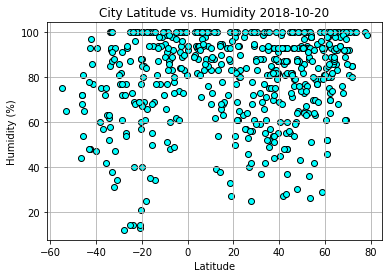

In [74]:
# Determining x and y axis
x_axis_graph2 = complete_df["Lat"]
y_axis_graph2 = complete_df["Humidity"]

# Creating Scatter plot
plt.scatter(x_axis_graph2, y_axis_graph2, marker="o", facecolors="aqua", edgecolors="black", alpha=1.00)

# Formating graph
plt.title(f"City Latitude vs. Humidity {str(datetime.datetime.now().date())}")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

# savigng an image in the folder with excel file
plt.savefig("../Resources/City_Latitude_vs_Humidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

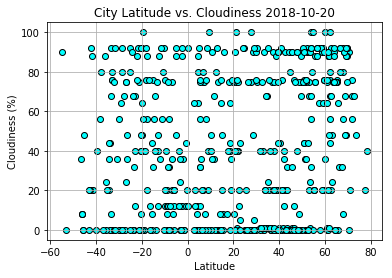

In [75]:
# Determining x and y axis
x_axis_graph3 = complete_df["Lat"]
y_axis_graph3 = complete_df["Cloudiness"]

# Creating Scatter plot
plt.scatter(x_axis_graph3, y_axis_graph3, marker="o", facecolors="aqua", edgecolors="black", alpha=1.00)

# Formating graph
plt.title(f"City Latitude vs. Cloudiness {str(datetime.datetime.now().date())}")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

# savigng an image in the folder with excel file
plt.savefig("../Resources/City_Latitude_vs_Cloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

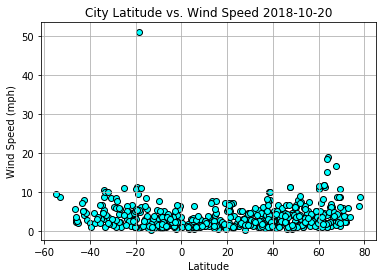

In [76]:
# Determining x and y axis
x_axis_graph4 = complete_df["Lat"]
y_axis_graph4 = complete_df["Wind Speed"]

# Creating Scatter plot
plt.scatter(x_axis_graph4, y_axis_graph4, marker="o", facecolors="aqua", edgecolors="black", alpha=1.00)

# Formating graph
plt.title(f"City Latitude vs. Wind Speed {str(datetime.datetime.now().date())}")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()

# savigng an image in the folder with excel file
plt.savefig("../Resources/City_Latitude_vs_WindSpeed.png")
plt.show()